#### 라이브러리 및 옵션 설정

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family ='AppleGothic') #맥용 폰트 설정

#mpl.rc('font', family ='Malgun Gothic') #윈도우용 폰트 설정

plt.rcParams['axes.unicode_minus'] = False #마이너스 숫자가 잘 나오도록 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') #선명하게 그리는 옵션

/var/folders/_b/znjp14gd02d8lg63thqc7bm40000gn/T/ipykernel_17667/1369781442.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina') #선명하게 그리는 옵션


#### 데이터 불러오기

In [2]:
df1 = pd.read_csv('chapter2_data.csv')
df1.head()

,id,유형,경로,날짜,결제유형,제품명,계약금액,상태,연체,연체기록,연결계좌,해약여부,나이,마일리지
0,66292722,렌탈,서비스 방문,2019-12-24,CMS,A,96900,계약확정,1,있음,신한은행,정상,64.0,2386.0
1,66784411,렌탈,홈쇼핑/방송,2019-12-24,카드이체,A,81900,계약확정,0,없음,외환카드,정상,38.0,1487.0
2,66766058,렌탈,일반,2019-11-07,CMS,C,102900,계약확정,0,없음,국민은행,정상,27.0,1342.0
3,66775111,렌탈,홈쇼핑/방송,2019-12-01,카드이체,A,96900,계약확정,0,없음,롯데카드,정상,24.0,1212.0
4,66784935,렌탈,서비스 방문,2019-12-26,CMS,A,105900,계약확정,0,없음,국민은행,정상,51.0,2124.0


#### 데이터 파악하기

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28555 entries, 0 to 28554
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28555 non-null  int64  
 1   유형      28555 non-null  object 
 2   경로      28555 non-null  object 
 3   날짜      28555 non-null  object 
 4   결제유형    28555 non-null  object 
 5   제품명     28555 non-null  object 
 6   계약금액    28555 non-null  int64  
 7   상태      28555 non-null  object 
 8   연체      28555 non-null  int64  
 9   연체기록    28555 non-null  object 
 10  연결계좌    28555 non-null  object 
 11  해약여부    28555 non-null  object 
 12  나이      28555 non-null  float64
 13  마일리지    28555 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.1+ MB


In [3]:
df1.describe(include = 'all')

,id,유형,경로,날짜,결제유형,제품명,계약금액,상태,연체,연체기록,연결계좌,해약여부,나이,마일리지
count,2.855500e+04,28555,28555,28555,28555,28555,28555.000000,28555,28555.000000,28555,28555,28555,28555.000000,28555.000000
unique,NaN,2,18,101,2,6,NaN,4,NaN,2,42,2,NaN,NaN
top,NaN,렌탈,서비스 방문,2019-10-25,CMS,A,NaN,계약확정,NaN,없음,롯데카드,정상,NaN,NaN
freq,NaN,27128,8836,494,18557,21262,NaN,28047,NaN,27505,6142,28074,NaN,NaN
mean,6.664544e+07,NaN,NaN,NaN,NaN,NaN,94956.571529,NaN,0.151042,NaN,NaN,NaN,46.583225,1967.358221
std,9.879706e+05,NaN,NaN,NaN,NaN,NaN,12591.330111,NaN,1.110066,NaN,NaN,NaN,13.397094,434.926055
min,2.573206e+07,NaN,NaN,NaN,NaN,NaN,55200.000000,NaN,0.000000,NaN,NaN,NaN,20.000000,877.000000
25%,6.665981e+07,NaN,NaN,NaN,NaN,NaN,87900.000000,NaN,0.000000,NaN,NaN,NaN,37.000000,1646.000000
50%,6.676788e+07,NaN,NaN,NaN,NaN,NaN,96900.000000,NaN,0.000000,NaN,NaN,NaN,46.000000,1947.000000
75%,6.678124e+07,NaN,NaN,NaN,NaN,NaN,98400.000000,NaN,0.000000,NaN,NaN,NaN,56.000000,2264.000000


---

#### 다변수

#### Boxplot
- [범주형] 컬럼 + [연속형] 컬럼 함께 살펴볼 때

옵션 : x/y축 변경, order, whis, (showcaps) + [hue]

In [6]:
df1['제품명'].value_counts()

제품명
A    21262
B     5392
C     1210
E      426
D      208
F       57
Name: count, dtype: int64

<Axes: xlabel='제품명', ylabel='계약금액'>

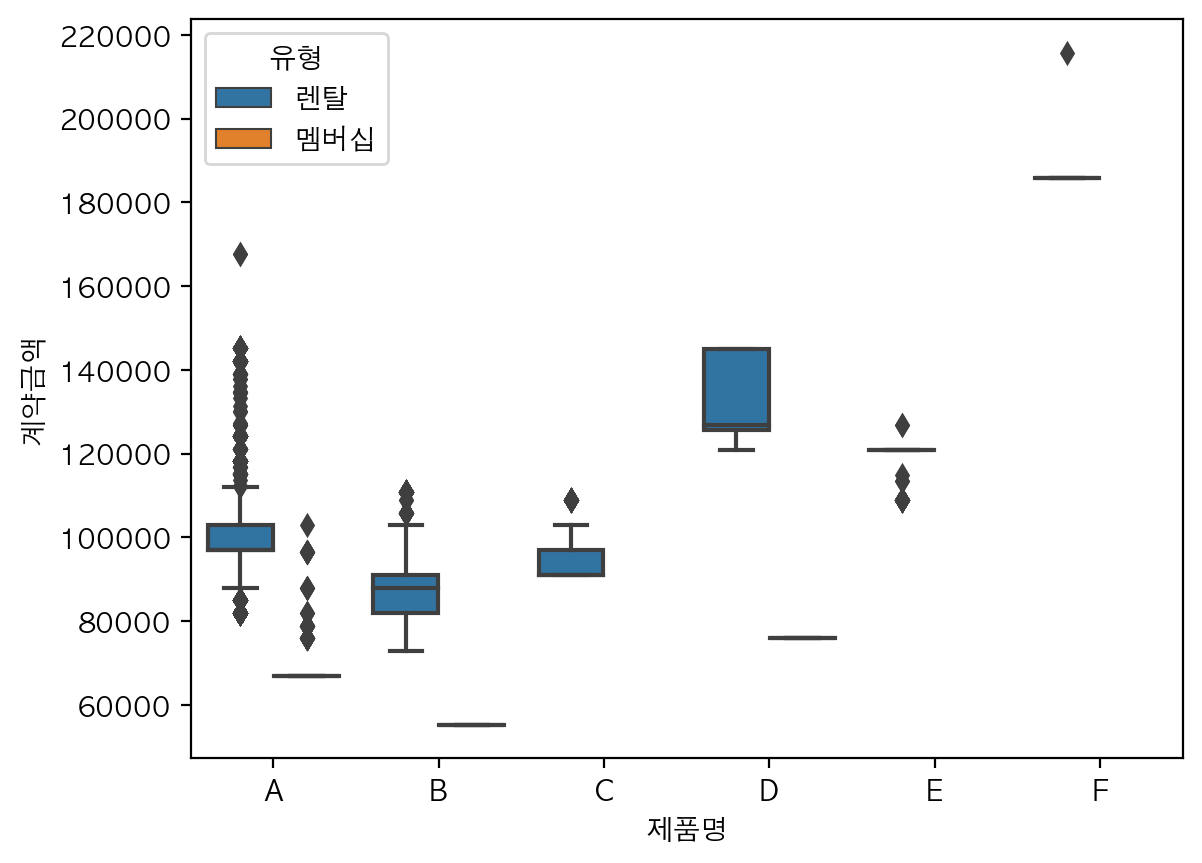

In [17]:
sns.boxplot(data = df1, x = '제품명', y = '계약금액', order = ['A','B','C','D','E','F'], hue = '유형', whis= 1.5, showcaps = True)

# order 옵션에서 리스트에 원하는 데이터만 넣으면 필터링됨
# wisker 옵션을 통해 이상치의 범위를 설정
# showcaps 옵션을 통해 Q1, Q3의 선 유무 설정(True는 보임(Default), False는 안보임)